In [52]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)


In [53]:
loc = '../data/'
file = 'data_features.csv'
df = pd.read_csv(loc+file)

try:
    df = df.drop(['str_dif.1'], axis=1)
except:
    pass

df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6317, 22)


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6314,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,0.019604,0.099797,0.391831,0.851785,0.010988,-0.008934,0.0,0.001079,-0.002757,-0.000656,-0.030837,1.329373,-0.002631,0.008714,-0.002954
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,0.019604,-0.231827,0.391831,0.851785,0.010988,-0.008934,0.0,0.001079,-0.002757,-0.000656,-0.030837,-1.626540,-0.002631,0.008714,-0.002954
6316,lose,David Levicki,Johnny Rhodes,1994-03-11,Open Weight,KO/TKO,Punches,0.019604,-0.268674,-0.393570,-0.006105,0.010988,-0.008934,0.0,0.001079,-0.002757,-0.000656,-0.030837,0.263790,-0.002631,0.008714,-0.002954


In [54]:
df.describe()

,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
count,6317.000000,6317.000000,6317.000000,6317.000000,6.317000e+03,6.317000e+03,6317.000000,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6317.000000,6317.000000,6317.000000,6317.000000
mean,0.000192,0.000006,-0.000061,0.000550,2.439158e-17,6.527415e-17,-0.005826,-1.944355e-17,-5.340762e-17,-2.999301e-17,2.421528e-17,-0.000065,0.000395,0.000226,-0.000182
std,1.000493,1.000560,1.000548,0.999931,1.000079e+00,1.000079e+00,1.028985,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000631,1.000147,1.000503,1.000472
min,-6.718075,-11.507028,-7.854886,-6.869225,-6.714261e+00,-3.473505e+00,-15.100000,-5.937584e+00,-6.192597e+00,-8.967481e+00,-5.767816e+00,-4.575577,-2.478395,-5.948528,-4.089695
25%,0.019604,-0.489756,-0.393570,-0.006105,-5.774715e-01,-5.979113e-01,-0.500000,-6.343080e-01,-5.804751e-01,-5.697772e-01,-5.523804e-01,-0.301314,-0.497784,-0.363614,-0.586774
50%,0.019604,-0.010744,-0.000869,-0.006105,1.098784e-02,-8.934282e-03,0.000000,1.078535e-03,-2.756701e-03,-6.556815e-04,-3.083687e-02,0.263790,-0.002631,0.008714,-0.002954
75%,0.019604,0.505115,0.391831,-0.006105,5.714253e-01,6.146885e-01,0.400000,6.427560e-01,5.749617e-01,5.684658e-01,5.776306e-01,0.263790,0.492522,0.381041,0.580866
max,6.757282,5.774245,5.104241,8.572796,6.265469e+00,3.455637e+00,15.400000,1.204826e+01,6.847333e+00,1.279193e+01,6.227686e+00,2.118268,2.473133,6.710611,3.499966


In [55]:
features = df.columns[7:]
len(features)
print(features)

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif'],
      dtype='object')


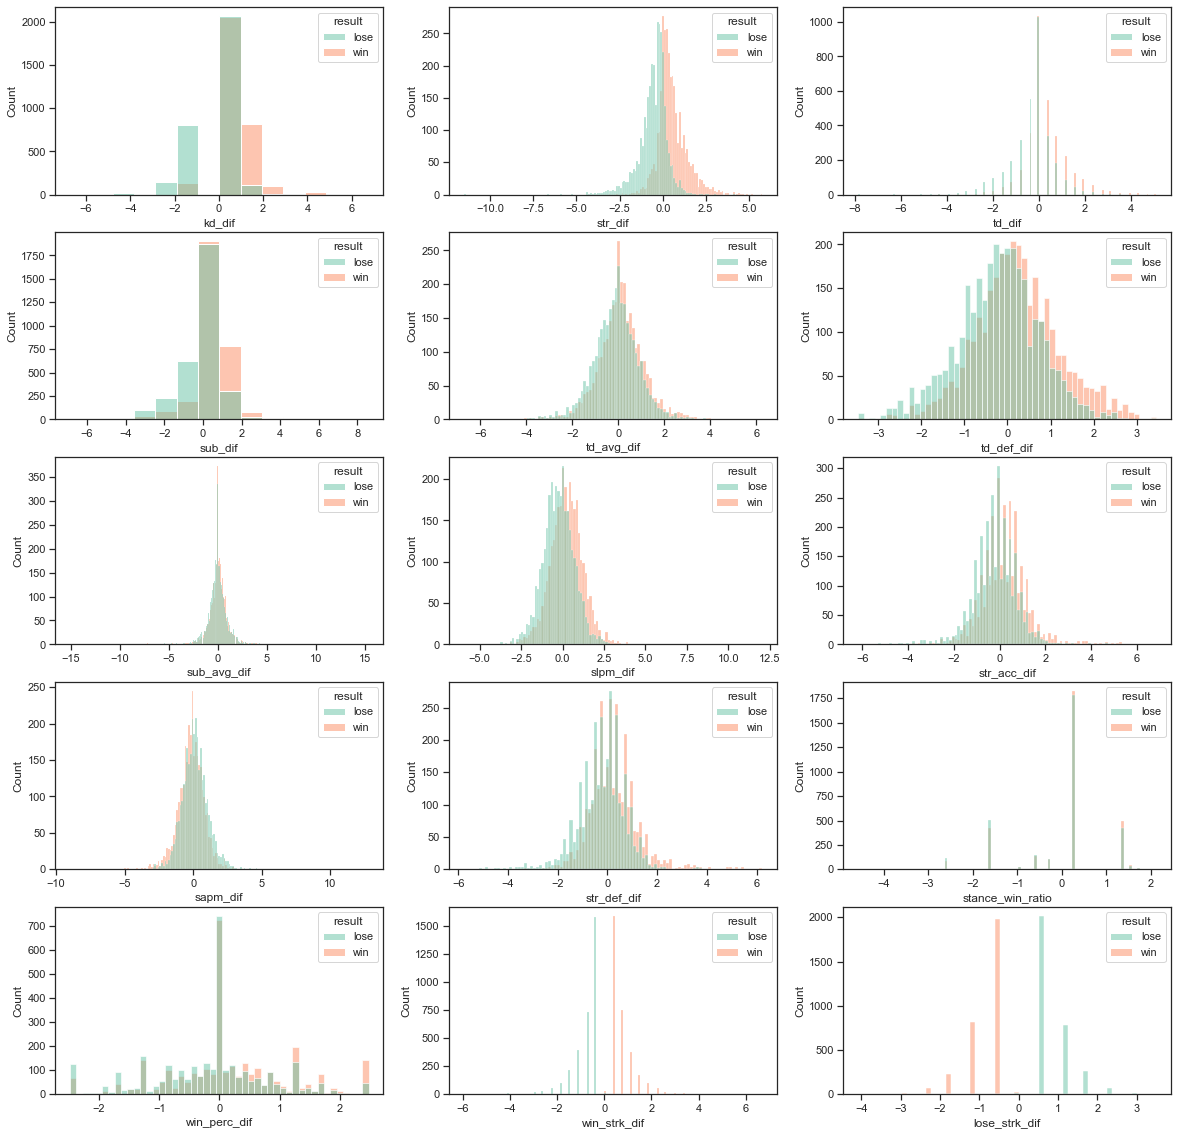

In [56]:
rows=5
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))

i = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(ax=axs[row,col], x=features[i], data=df, hue='result')
        i += 1

In [57]:
X = features # prediction model features
data = df.copy()
data['outlier'] = False

for feature in X:
    ucl = np.mean(df[feature]) + 3*np.std(df[feature])
    lcl = np.mean(df[feature]) - 3*np.std(df[feature])
    
    inlier_list = df.index[(df[feature] > ucl)|(df[feature] < lcl)]
    data.loc[inlier_list,'outlier'] = True
    print('1d Outliers at %s: %s' %(feature,len(inlier_list)))

data.head(3)       

1d Outliers at kd_dif: 55
1d Outliers at str_dif: 88
1d Outliers at td_dif: 108
1d Outliers at sub_dif: 116
1d Outliers at td_avg_dif: 79
1d Outliers at td_def_dif: 23
1d Outliers at sub_avg_dif: 92
1d Outliers at slpm_dif: 41
1d Outliers at str_acc_dif: 106
1d Outliers at sapm_dif: 63
1d Outliers at str_def_dif: 117
1d Outliers at stance_win_ratio: 8
1d Outliers at win_perc_dif: 0
1d Outliers at win_strk_dif: 74
1d Outliers at lose_strk_dif: 14


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier
0,lose,Arnold Allen,Max Holloway,2023-04-15,Featherweight,U-DEC,Unanimous,0.019604,-2.626886,-0.000869,-0.006105,0.481755,-0.286100,0.0,-2.402067,-0.580475,-1.221105,0.143011,1.329373,0.665825,-0.363614,0.580866,False
1,win,Edson Barboza,Billy Quarantillo,2023-04-15,Featherweight,KO/TKO,Knee,1.367139,0.062950,-0.000869,-0.006105,-0.622306,0.580043,-1.1,-2.427230,-1.158193,-1.056692,1.533794,0.263790,-0.299722,0.381041,-0.586774,False
2,lose,Dustin Jacoby,Azamat Murzakanov,2023-04-15,Light Heavyweight,U-DEC,Unanimous,-1.327932,-0.121285,-0.000869,-0.006105,-0.185165,-0.805786,0.0,0.548392,-0.828069,0.574789,0.056087,-1.626540,-0.497784,-0.735942,1.164686,False


<AxesSubplot:xlabel='sub_avg_dif', ylabel='td_dif'>

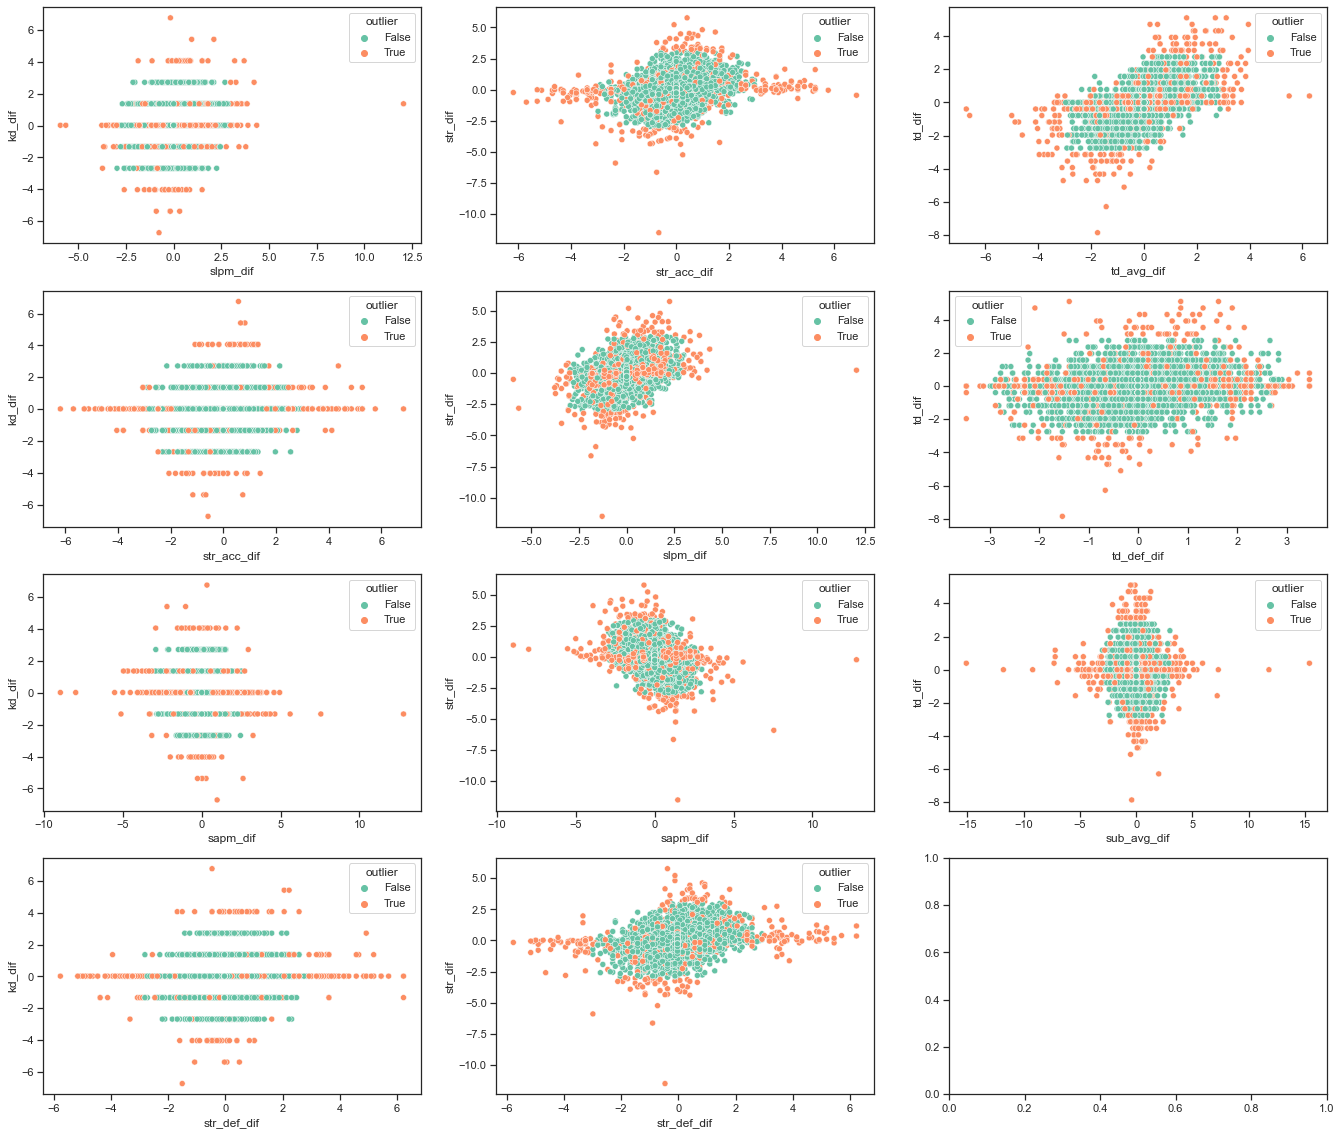

In [63]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='outlier')

## Train Local Outlier Factor model: 
LOF model detect outliers based on data points density, a point with lower density will be counted as an outlier

In [64]:
X

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif'],
      dtype='object')

In [65]:
lof = set_outlier_detection_model(X_columns=X, data=data, n=20, contemination=0.05)
lof

LocalOutlierFactor(contamination=0.05, n_jobs=-1)

In [75]:
data['lof_inlier'] = lof.fit_predict(data[X])
lof_outliers = data.index[data.lof_inlier == -1]
data['lof_outlier'] = False
data.loc[lof_outliers, 'lof_outlier'] = True
data = data.drop(['lof_inlier'], axis=1)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6314,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,0.019604,0.099797,0.391831,0.851785,0.010988,-0.008934,0.0,0.001079,-0.002757,-0.000656,-0.030837,1.329373,-0.002631,0.008714,-0.002954,False,False
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,0.019604,-0.231827,0.391831,0.851785,0.010988,-0.008934,0.0,0.001079,-0.002757,-0.000656,-0.030837,-1.626540,-0.002631,0.008714,-0.002954,False,False
6316,lose,David Levicki,Johnny Rhodes,1994-03-11,Open Weight,KO/TKO,Punches,0.019604,-0.268674,-0.393570,-0.006105,0.010988,-0.008934,0.0,0.001079,-0.002757,-0.000656,-0.030837,0.263790,-0.002631,0.008714,-0.002954,False,False


<AxesSubplot:xlabel='sub_avg_dif', ylabel='td_dif'>

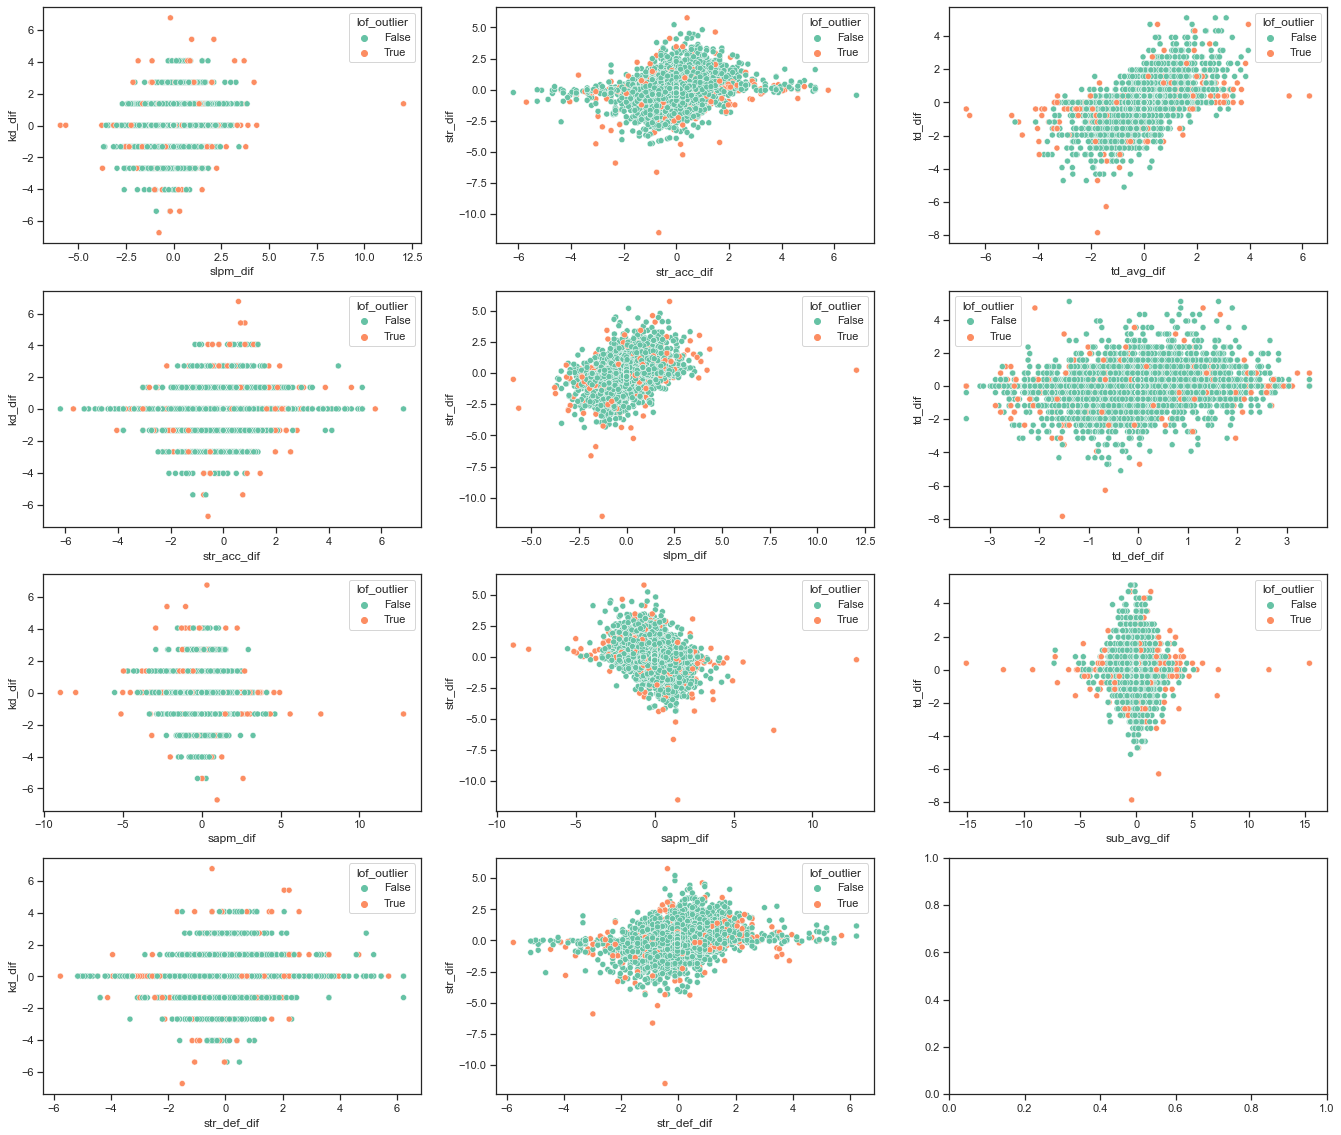

In [74]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='lof_outlier')

In [76]:
data.to_csv('../data/data_features_outliers_detected.csv', index=None)
print('../data/data_features_outliers_detected.csv saved.')

../data/data_features_outliers_detected.csv saved.
